In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Embedding, TimeDistributed
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

In [3]:
chars = 'abcdefghijklmnopqrstuvwxyz'
char2idx = {ch: i for i, ch in enumerate(chars)}
idx2char = {i: ch for i, ch in enumerate(chars)}
vocab_size = len(chars)

def generate_data(num_samples=10000, seq_length=7):
    X, Y = [], []
    for _ in range(num_samples):
        start = np.random.randint(0, len(chars) - seq_length - 1)
        inp_seq = chars[start:start+seq_length]
        tgt_seq = chars[start+1:start+seq_length+1]
        X.append([char2idx[ch] for ch in inp_seq])
        Y.append([char2idx[ch] for ch in tgt_seq])
    return np.array(X), np.array(Y)

X, Y = generate_data()
Y_onehot = to_categorical(Y, num_classes=vocab_size)
def build_and_train(model_type='RNN', epochs=20):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=X.shape[1]))

    if model_type == 'RNN':
        model.add(SimpleRNN(64, return_sequences=True))
    elif model_type == 'LSTM':
        model.add(LSTM(64, return_sequences=True))
    elif model_type == 'GRU':
        model.add(GRU(64, return_sequences=True))

    model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X, Y_onehot, epochs=epochs, batch_size=64, validation_split=0.2, verbose=1)
    return model, history
rnn_model, rnn_history = build_and_train('RNN')
lstm_model, lstm_history = build_and_train('LSTM')
gru_model, gru_history = build_and_train('GRU')

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8441 - loss: 1.8001 - val_accuracy: 1.0000 - val_loss: 0.1190
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 0.0757 - val_accuracy: 1.0000 - val_loss: 0.0199
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 0.0157 - val_accuracy: 1.0000 - val_loss: 0.0080
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - v

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5207 - loss: 2.6231 - val_accuracy: 0.9370 - val_loss: 0.5379
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9649 - loss: 0.3447 - val_accuracy: 0.9911 - val_loss: 0.0853
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9928 - loss: 0.0626 - val_accuracy: 1.0000 - val_loss: 0.0264
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - loss: 0.0191 - val_accuracy: 1.0000 - val_loss: 0.0091
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.000

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6760 - loss: 2.3863 - val_accuracy: 0.9757 - val_loss: 0.1709
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9921 - loss: 0.1093 - val_accuracy: 1.0000 - val_loss: 0.0276
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 1.0000 - loss: 0.0200 - val_accuracy: 1.0000 - val_loss: 0.0088
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.000

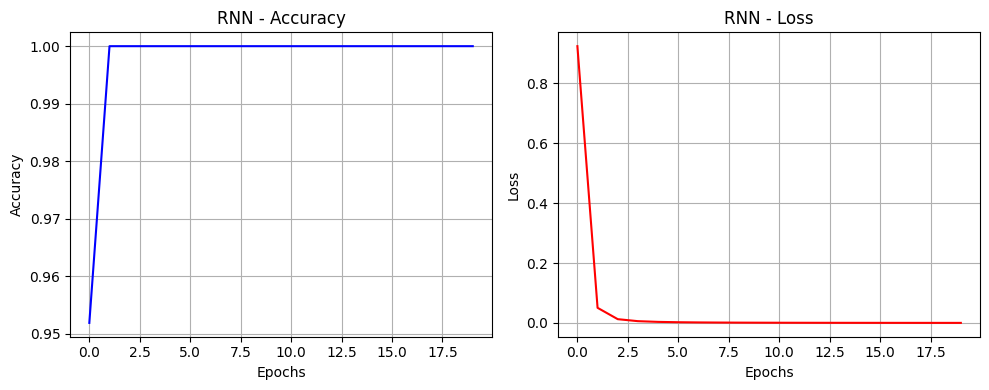

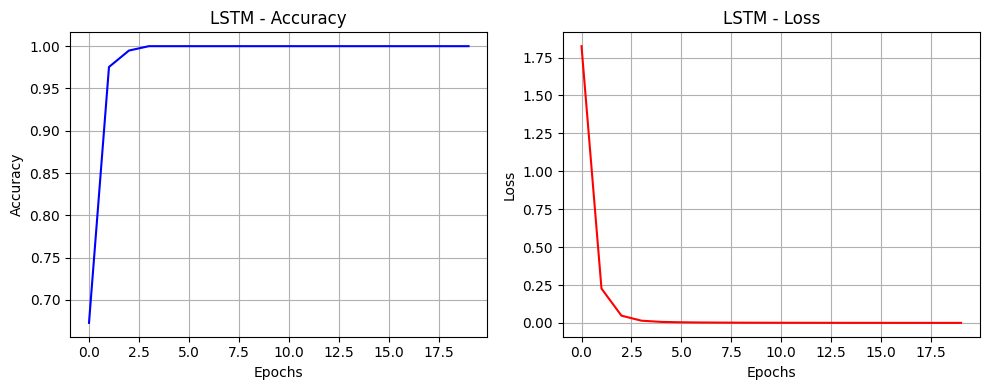

In [4]:
def plot_individual_model(history, title):
    plt.figure(figsize=(10, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='red')
    plt.title(f"{title} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call this after training
plot_individual_model(rnn_history, "RNN")
plot_individual_model(lstm_history, "LSTM")
plot_individual_model(gru_history, "GRU")

In [6]:
print("Final Validation Accuracy:")
print(f"RNN  : {rnn_history.history['val_accuracy'][-1]*100:.2f}%")
print(f"LSTM : {lstm_history.history['val_accuracy'][-1]*100:.2f}%")
print(f"GRU  : {gru_history.history['val_accuracy'][-1]*100:.2f}%")

Final Validation Accuracy:
RNN  : 100.00%
LSTM : 100.00%
GRU  : 100.00%


In [7]:
def predict_sequence(model, input_seq):
    pred = model.predict(np.array([input_seq]))
    pred_indices = np.argmax(pred[0], axis=1)
    return ''.join([idx2char[i] for i in pred_indices])

for i in range(5):
    input_seq = X[i]
    input_text = ''.join([idx2char[x] for x in input_seq])
    target_text = ''.join([idx2char[y] for y in Y[i]])
    print("Input :", input_text)
    print("Target:", target_text)
    print("RNN   :", predict_sequence(rnn_model, input_seq))
    print("LSTM  :", predict_sequence(lstm_model, input_seq))
    print("GRU   :", predict_sequence(gru_model, input_seq))
    print("-" * 40)

Input : ghijklm
Target: hijklmn
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
RNN   : hijklmn
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
LSTM  : hijklmn
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
GRU   : hijklmn
----------------------------------------
Input : opqrstu
Target: pqrstuv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
RNN   : pqrstuv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
LSTM  : pqrstuv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
GRU   : pqrstuv
----------------------------------------
Input : klmnopq
Target: lmnopqr
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
RNN   : lmnopqr
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
LSTM  : lmnopqr
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
GRU   : lmnopqr
----------------------------------------
Input : hijklmn
Target: ijklmno
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
RNN   : ijklmno
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
LSTM  : ijklmno
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
GRU   : ijklmno
----------------------------------------
Input : ghijklm
Target: hijklmn
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Models Used
Three distinct models were developed using the Keras Sequential API:

 Simple RNN Model

Embedding Layer: Maps character indices to dense vector representations (size = 32)

SimpleRNN Layer: Comprises 64 units, configured with return_sequences=True to retain outputs at every time step

TimeDistributed Dense Layer: Applies a dense layer with softmax activation across all time steps for probability distribution

Optimizer: Trained using the Adam optimizer

LSTM Model

Architecture: Follows the same layout as the Simple RNN model, replacing the SimpleRNN with an LSTM layer

LSTM Layer: Incorporates internal memory units to effectively capture long-term patterns in the sequence

GRU Model

GRU Layer: Substitutes the recurrent layer with a GRU, offering a compact alternative to LSTM

Efficiency: GRU has fewer parameters, enabling faster training and lower resource consumption

Application: Well-suited for sequence-based problems, especially where computational cost is a concern

Training Configuration

Dataset Size: 10,000 total character sequences

Sequence Length: Each sequence contains 7 characters

Batch Size: Training is performed in batches of 64 sequences

Epochs: Models are trained for 20 epochs

Validation Split: 20% of the dataset is reserved for validation purposes

Input Format: Characters are encoded as integers

Output Format: Target outputs are represented as one-hot encoded vectors for the next character prediction